# NOTEBOOK 2: Data handling and basic statistics

## Data handling
---
In python exist two main data analysis libraries `pandas` and `polars`. In this tutorial `pandas` will be used.

The pandas documentation can be found under https://pandas.pydata.org/

### Data loading

In [ ]:
import pandas as pd

df_white = pd.read_csv('data/winequality-white.csv', sep=';')
df_white.head() # Prints the first 5 rows of the dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df_white.describe() # Prints the summary statistics of the dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
df_white.info() # Prints the information (datatypes etc.) about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Indexing data

In [5]:
df_white["fixed acidity"] # Access a column in the dataframe
df_white.loc[5:10, ["fixed acidity", "pH"]] # Access multiple columns in the dataframe and rows by index

,fixed acidity,pH
5,8.1,3.26
6,6.2,3.18
7,7.0,3.00
8,6.3,3.30
9,8.1,3.22
10,8.1,2.99


In [6]:
df_white.groupby('quality')['alcohol'].mean() # Group by quality and calculate the mean of alcohol content

quality
3    10.345000
4    10.152454
5     9.808840
6    10.575372
7    11.367936
8    11.636000
9    12.180000
Name: alcohol, dtype: float64

In [7]:
quality_level = 5
df_white.query('quality == @quality_level') # Query the dataframe for a specific quality level

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0,5
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,5
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.8,5
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
19,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4882,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,5
4884,6.5,0.33,0.38,8.30,0.048,68.0,174.0,0.99492,3.14,0.50,9.6,5
4888,6.8,0.22,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4892,6.5,0.23,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5


In [8]:
df_white_copy = df_white.copy() # Create a deep copy of the dataframe to avoid modifying the original one

# Combine fixed and volatile acidity into a new column called total_acidity
df_white_copy['total_acidity'] = df_white_copy['fixed acidity'] + df_white_copy['volatile acidity']
df_white_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,7.27
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,6.60
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,8.38
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,7.43
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,7.43


In [9]:
df_white_copy['origin'] = "unknown" # Add a new column 'origin' with default value "unknown"
df_white_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity,origin
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,7.27,unknown
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,6.60,unknown
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,8.38,unknown
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,7.43,unknown
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,7.43,unknown


In [10]:
df_white_copy.info() # Check the information of the modified dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  total_acidity         4898 non-null   float64
 13  origin                4898 non-null   object 
dtypes: float64(12), int64(1), object(1)
memory usage: 535.8+ KB


In [11]:
df_white_copy['origin'] = df_white_copy['origin'].astype('category') # Change the type of origin to category

In [12]:
df_white_copy.info() # Check the information of the modified dataframe again to see the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  total_acidity         4898 non-null   float64 
 13  origin                4898 non-null   category
dtypes: category(1), float64(12), int64(1)
memory usage: 502.

## Plotting
---
### Pure matplotlib API
Plotting artificial time series data

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.1, size=100)  # noisy sine wave

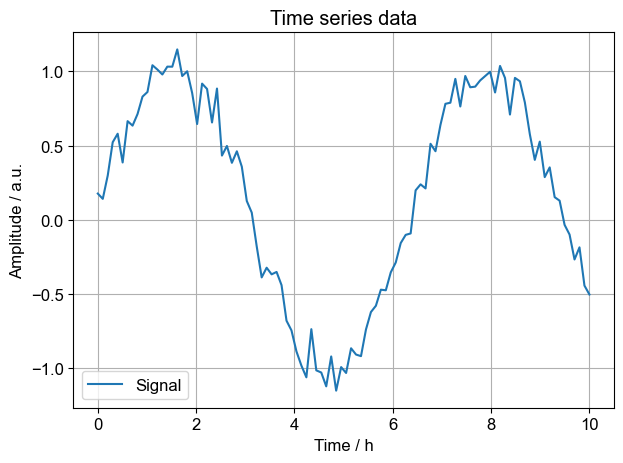

In [14]:
# Set the style for the plot
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Create a time series plot
plt.figure()
plt.plot(x, y, label='Signal')
plt.xlabel('Time / h')
plt.ylabel('Amplitude / a.u.')
plt.title('Time series data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Pandas built-in plotting

<Axes: title={'center': 'Quality > 7'}, xlabel='fixed acidity', ylabel='alcohol'>

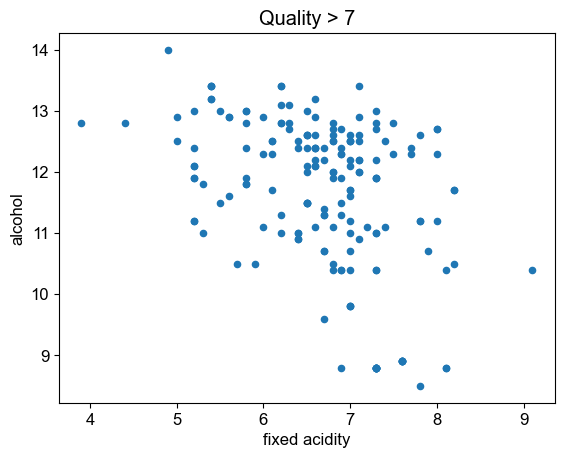

In [15]:
quality_level = 7

# Create a scatter plot for wines with quality greater than the specified level
df_white.query('quality > @quality_level').plot(
    kind='scatter',
    x='fixed acidity',
    y='alcohol',
    title=f'Quality > {quality_level}',
)

Enhance visual appearence

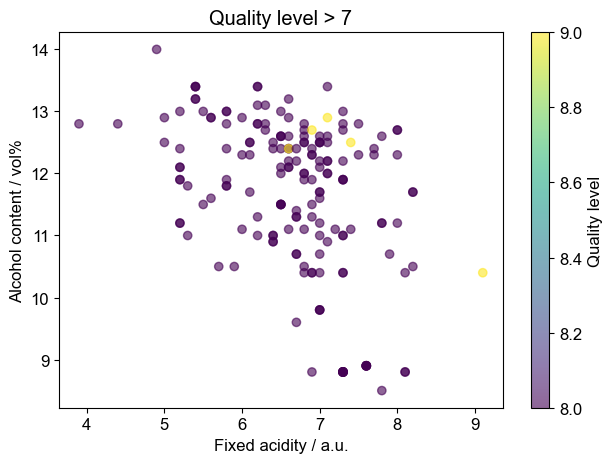

In [16]:
plt.figure()

# Filter data
filtered_df = df_white.query('quality > @quality_level')

# Create scatter plot
sc = plt.scatter(
    filtered_df['fixed acidity'],
    filtered_df['alcohol'],
    c=filtered_df['quality'],
    cmap='viridis',
    alpha=0.6
)

# Set titles and labels
plt.title(f'Quality level > {quality_level}')
plt.xlabel('Fixed acidity / a.u.')
plt.ylabel('Alcohol content / vol%')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Quality level')

# Adjust layout and save
plt.tight_layout()
plt.savefig(f'quality_{quality_level}_alcohol_vs_fixed_acidity.png')
plt.show()

## Confidence intervall
---

When you estimate the mean of a population you often want to provide a range of values that is likely to contain the true population parameter. This is the confidence interval (CI).

### $t$-statistic (one sample mean)

When the population standard deviation is unknown (common in practice) and sample size is small (<30), you use the $t$-distribution instead of normal ($z$) distribution

$$
\text{CI} = \bar{x} \pm t \cdot \frac{s}{\sqrt{n}}
$$

where $\bar{x}$ is sample mean $s$ is sample standard deviation, $n$ sample size, $t$ critical $t$-value for the desired confidence level (e.g. 95%) with $n-1$ degrees of freedom

In [17]:
data = df_white.query('quality == 3')['alcohol']
data.describe()

count    20.000000
mean     10.345000
std       1.224089
min       8.000000
25%       9.550000
50%      10.450000
75%      11.000000
max      12.600000
Name: alcohol, dtype: float64

In [18]:
sem = stats.sem(data)  # equivalent to np.std(data, ddof=1) / np.sqrt(len(data))

confidence = 0.95

t = stats.t.ppf((1 + confidence) / 2, len(data)-1)

margin_of_error = t * sem

mean = data.mean()

ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"Sample mean: {mean:.2f}")
print(f"95% confidence interval: ({ci_lower:.2f}, {ci_upper:.2f}) for n = {len(data)}")

Sample mean: 10.34
95% confidence interval: (9.77, 10.92) for n = 20


## Hypothesis testing
---

In [20]:
df_red = pd.read_csv("data/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("data/winequality-white.csv", delimiter=";")

#DataFrame consisting only of fixed acidities:
df_fa = pd.concat([df_red["fixed acidity"], df_white["fixed acidity"]], ignore_index=True, axis=1)
df_fa.columns = ['red', 'white']

<Axes: >

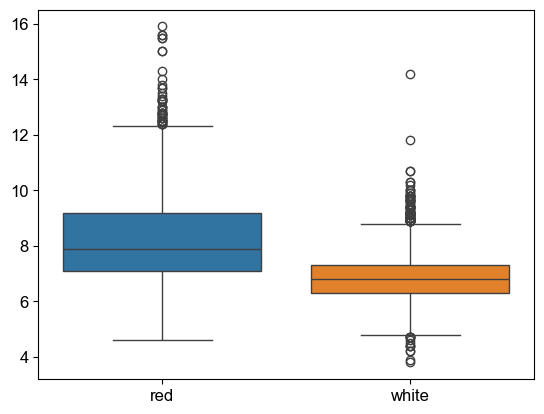

In [ ]:
import seaborn as sns

sns.boxplot(data = df_fa)
plt.xlabel('Wine Type')
plt.ylabel('Fixed Acidity / a.u.')
plt.show()

### One-sample $t$-test

Used when the true population mean is known

**The wine manufacturere says that the fixed acidity for red wines is 8.33.**
The value 8.33 might have come from the certificate of analysis of a standard reference material for example.

### Hypotheses

- **Null hypothesis (H₀):** The mean of the sample **is identical** to the specified population mean.
- **Alternative hypothesis (H₁):** The mean of the sample **is not identical** to the specified population mean.

In [22]:
df_fa['red'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: red, dtype: float64

The module `pingouin` implements a lot of usefull statistical tests (see: https://pingouin-stats.org/build/html/index.html)

In [ ]:
import pingouin as pg

pg.ttest(df_fa['red'], 8.33, correction='auto')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.237999,1598,two-sided,0.811912,"[8.23, 8.41]",0.005952,0.029,0.056506


The results can be interpreted in that way:
With a probability of 81.2 % to get a sample mean of 8.32 it the true population mean is 8.33

### Two-sample $t$-test
A two-sample t-test (also called independent samples t-test) is used to determine whether the means of two independent groups are significantly different from each other.

When to use it?

- You have two separate groups (e.g. treatment vs. control)
- You want to test if their population means are equal
- Data is approximately normally distributed within each group
- Variances are assumed equal (when unequal use Welch’s t-test)

### Hypotheses

- **Null hypothesis (H₀):** The population means of the two groups **are equal**.
- **Alternative hypothesis (H₁):** T the population means of the two groups **are not equal**.

In [24]:
df_fa.dropna().describe()

,red,white
count,1599.000000,1599.000000
mean,8.319637,7.016948
std,1.741096,0.879253
min,4.600000,4.800000
25%,7.100000,6.400000
50%,7.900000,7.000000
75%,9.200000,7.500000
max,15.900000,14.200000


In [25]:
pg.ttest(df_fa['red'], df_fa['white'], correction='auto')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,32.422711,1848.947934,two-sided,5.668161e-183,"[1.38, 1.55]",1.293371,4.834e+209,1.0


A p-value that small indicates that it is very (very) unlikely that the means of the two groups are identical

### ANOVA
---
ANOVA (Analysis of Variance) is a statistical method used to test whether there are significant differences between the means of three or more groups.

**Why not use multiple t-tests?**

If we were to compare each pair of groups with individual t-tests, the probability of making a Type I error (false positive) increases with each test. ANOVA controls this error rate by testing all groups simultaneously in a single procedure.

---

#### Hypotheses

- **Null hypothesis (H₀):** All group means are equal.
- **Alternative hypothesis (H₁):** At least one group mean is different.

#### Basic idea

ANOVA compares **two sources of variability**:
- **Between-group variability:** Variance due to the interaction between the different groups (how much group means differ from the overall mean).
- **Within-group variability:** Variance due to differences within individual groups (natural spread of data).

From this variabilities a F-statistic and its corresponding p-value according to the F-distribution are calculated.

If the null hypothesis is rejected the Tukey's HSD (Honestly Significant Difference) post hoc test can be conducted to identify the groups which reject the null hypothesis.


In [26]:
df_red.groupby('quality')['residual sugar'].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,2.635000,1.401596,1.2,1.875,2.1,3.10,5.7
4,53.0,2.694340,1.789436,1.3,1.900,2.1,2.80,12.9
5,681.0,2.528855,1.359753,1.2,1.900,2.2,2.60,15.5
6,638.0,2.477194,1.441576,0.9,1.900,2.2,2.50,15.4
7,199.0,2.720603,1.371509,1.2,2.000,2.3,2.75,8.9
8,18.0,2.577778,1.295038,1.4,1.800,2.1,2.60,6.4


In [27]:
df_red.anova(dv="residual sugar", between="quality")

,Source,ddof1,ddof2,F,p-unc,np2
0,quality,5,1593,1.053374,0.384619,0.003295


In [28]:
df_red.groupby('quality')['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


In [29]:
df_red.anova(dv="alcohol", between="quality")

,Source,ddof1,ddof2,F,p-unc,np2
0,quality,5,1593,115.854797,1.209895e-104,0.266667


## EXCURSE: Plotting the Mandelbrot set

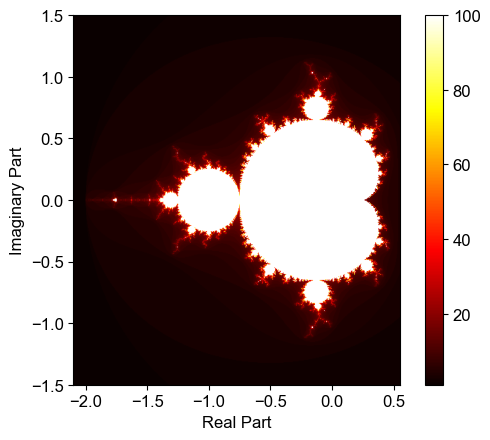

In [30]:
def mandelbrot(c: complex, max_iter: int) -> int:
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def mandelbrot_set(real_part_lim: tuple[int], im_part_lim: tuple[int], max_iter: int) -> np.ndarray:
    real_parts = np.linspace(*real_part_lim, 500)
    im_parts = np.linspace(*im_part_lim, 500)

    return np.array([[mandelbrot(complex(r, i), max_iter) for r in real_parts] for i in im_parts])

def display_mandelbrot(real_part_lim: tuple[int], im_part_lim: tuple[int], max_iter: int):
    mandelbrot_values = mandelbrot_set(real_part_lim, im_part_lim, max_iter)


    plt.imshow(mandelbrot_values, extent=real_part_lim + im_part_lim, cmap='hot')
    plt.colorbar()
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.show()


# Example usage
display_mandelbrot((-2.1, 0.55), (-1.5, 1.5), 100)
# This will display the Mandelbrot set for the specified limits and maximum iterations.